<a href="https://colab.research.google.com/github/Spica08/deep-learning-from-scratch-5/blob/main/step5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# set up
import os
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
#データ準備
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# step5 EMアルゴリズム

## 5.1 KLダイバージェンス

### 5.1.1 数式の表記について
連続型の確率変数xがあり、その確率密度がp(x)で表される時、関数f(x)の期待値は以下のように表す。  
\begin{equation}
\mathbb{E}_{p(x)}[f(x)] = \int f(x)p(x)dx
\end{equation}
また、パラメータθを持つ確率分布は以下のように表す。
\begin{equation}
p_\theta(x)
\end{equation}

### 5.1.2 KLダイバージェンスの定義式
2つの確率分布を測る尺度の1つであるKLダイバージェンスは以下の式で表される。
\begin{equation}
D_{KL}(p||q) = \int p(x)log\frac{p(x)}{q(x)}dx ・・・連続変数
\end{equation}
\begin{equation}
D_{KL}(p||q) = \sum\nolimits_{x} p(x)log\frac{p(x)}{q(x)}dx ・・・離散変数
\end{equation}
KLダイバージェンスは以下の特性を持つ。  
(1) 2つの確率分布が異なるほど大きな値をとる。  
(2) 0以上の値を取り、2つの確率分布が同じ時のみ0になる。  
(3) 非対称な尺度であり、 $D_{KL}(p||q)$と$D_{KL}(q||p)$は異なる値となる。  


### 5.1.3 KLダイバージェンスと最尤推定の関係
仮に、真の確率分布$p_*(x)$があり、サンプルデータ$D = \lbrace x^{(1)}, x^{(2)}, \dots, x^{(n)}\rbrace$が得られた場合を考える。この時の目的は、パラメータθで調整できる確率分布$p_\theta(x)$を使って、真の分布$p_*(x)$にできるだけ近い確率分布を作ることである。最尤推定では、以下の対数尤度を目的関数とする。
\begin{equation}
log\prod_{n = 1}^N p_\theta(x^{(n)}) = \sum_{n = 1}^N log p_\theta(x^{(n)})
\end{equation}
この時、対数尤度を最大化するパラメータは以下の通り
\begin{equation}
\hat{\theta} = argmax_\theta \sum_{n = 1}^N log p_\theta(x^{(n)})
\end{equation}
これをKLダイバージェンスから導く。

最終的な目的(=パラメータθで調整できる確率分布$p_\theta(x)$を使って、真の分布$p_*(x)$にできるだけ近い確率分布を作る)は、「$p_\theta(x)$と$p_*(x)$のKLダイバージェンスを最小化する」と言い換えられる。2つの分布のKLダイバージェンスは、
\begin{equation}
D_{KL}(p_*||p_\theta) = \int p_*(x) log \frac{p_*(x)}{p_\theta(x)}d\theta
\end{equation}
$p_*(x)$の表現が不明なためこの積分は計算できない。そこでこの計算を**モンテカルロ法**により近似することを考える。  


#### 5.1.3.1 モンテカルロ法の説明
モンテカルロ法は、乱数を用いて複雑な確率分布や期待値などの近似値を計算するための手法。ランダムに生成されたサンプルを用いて問題をシミュレートし、それらのサンプルから求めた結果の平均を取ることで問題の解を近似する。ここではモンテカルロ法を用いて以下の期待値を求める。
\begin{equation}
\mathbb{E}_{p_*(x)}[f(x)] = \int p_*(x) f(x) dx
\end{equation}
ここで、$p_*(x)$は確率分布、$f(x)$は任意の関数である。先ほど同様具体的な真の分布が不明なため積分計算は不可能であるため、モンテカルロ法を用いて以下のように近似する。  
(1) 確率分布$p_*(x)$に従ってサンプル{$x^{(1)}, x^{(2)}, ..., x^{(N)}$}を生成する。  
(2) 各データ$x^{(i)}$における$f(x^{(i)})$を求め、平均値を計算する。  
この手順により、上の式は以下のように表される。
\begin{align}
\mathbb{E}_{p_*(x)}[f(x)] &= \int p_*(x) f(x) dx\\
                           &\approx \frac{1}{N} \sum_{n = 1}^N f(x^{(n)})\qquad(x^{(n)} \sim p_*(x))
\end{align}

したがってモンテカルロ法を適用して、
\begin{align}
D_{KL}(p_*||p_\theta) &= \int p_*(x) log \frac{p_*(x)}{p_\theta(x)}d\theta\\
                       &\approx \frac{1}{N} \sum_{n = 1}^N log\frac{p_*(x^{(n)})}{p_\theta(x^{(n)})} \qquad(x^{(n)} \sim p_*(x))\\
                       &= \frac{1}{N} \sum_{n = 1}^N \left(log p_*(x^{(n)}) - log p_\theta(x^{(n)}) \right)
\end{align}
これを最小化するパラメータθを求めたいので、
\begin{align}
argmin_\theta &\approx argmin_\theta \left(\frac{1}{N} \sum_{n = 1}^N \left(log p_*(x^{(n)}) - log p_\theta(x^{(n)}) \right)\right)\\
               &= argmin_\theta \left(\frac{1}{N} \sum_{n = 1}^N - log p_\theta(x^{(n)}) \right) \qquad \thetaが関与する項のみ残す\\
               &= argmin_\theta \left(-\sum_{n = 1}^N log p_\theta(x^{(n)}) \right)\\
               &= argmax_\theta \left(\sum_{n = 1}^N log p_\theta(x^{(n)}) \right)
\end{align}
以上より、
\begin{align}
argmin_\theta D_{KL}(p_*||p_\theta) &\approx argmax_\theta \left(\sum_{n = 1}^N log p_\theta(x^{(n)}) \right)
\end{align}
が成り立ち、KLダイバージェンスが最小となるパラメータθと、対数尤度が最大となるパラメータθが等しいことが示された。

## 5.2 EMアルゴリズムの導出1

### 5.2.1 潜在変数を持つモデル
観測できる確率変数をx、潜在変数をz、パラメータをθで表すとき、1つのデータに対する対数尤度は確率の周辺化により以下のように表される。
\begin{equation}
log p_\theta(x) = log \sum\nolimits_zp_\theta(x, z)
\end{equation}
(確率変数が離散、スカラと仮定している)  
続いてサンプル$D = \lbrace x^{(1)}, x^{(2)}, \dots, x^{(n)}\rbrace$が得られた場合を考える。このサンプルに対する対数尤度は、
\begin{align}
log p_\theta(D) &= log \left(p_\theta(x^{(1)})p_\theta(x^{(2)}) \dots p_\theta(x^{(N)})\right)\\
                 &= \sum_{n = 1}^N log p_\theta(x^{(n)})\\
                 &= \sum_{n = 1}^N log \sum\nolimits_{z^{(n)}} p_\theta(x^{(n)}, z^{(n)})
\end{align}
これはlog-sumの形となっており解析的に解くことができない。EMアルゴリズムではこれをsum-logの形に変換することで解決する。(潜在変数の確率分布はサンプルごとに仮定している？)  
これ以降、まずは1つのデータに関するEMアルゴリズムを考え、その後N個のデータへと拡張する。

1つのデータに関する対数尤度についてもう一度考える。(潜在変数zが観測できたとして、)
\begin{align}
log p_\theta(x) &= log \frac{p_\theta(x, z)}{p_\theta(z | x)} \qquad 確率の乗法定理より
\end{align}
分母の条件付き確率(パラメータθの元でデータxが得られた時の、潜在変数zの事後分布？)の存在によりlog-sumを解決できたわけではない。

### 5.2.2 任意の確率分布q(z)
以上の問題に対処するためq(z)を考える。このq(z)はzに関する任意の確率分布を表し、扱いが難しい$p_\theta(z|x)$の近似分布として用いる。  
したがって式展開は以下の通り
\begin{align}
log p_\theta(x) &= log \sum\nolimits_zp_\theta(x, z)\\
                &= log \frac{p_\theta(x, z)}{p_\theta(z | x)}\\
                &= log \frac{p_\theta(x, z)}{p_\theta(z | x)} \frac{q(z)}{q(z)}\\
                &= log \frac{p_\theta(x, z)}{q(z)} + log \frac{q(z)}{p_\theta(z | x)}
\end{align}
第2項の$p_\theta(z | x)$を、KLダイバージェンスで対処する。
\begin{align}
log p_\theta(x) &= log p_\theta(x) \sum\nolimits_{z}q(z) \because \sum\nolimits_{z}q(z) = 1\\
                &= \sum\nolimits_{z}q(z)log p_\theta(x)\\
                &= \sum\nolimits_{z}q(z)\left(log \frac{p_\theta(x, z)}{q(z)} + log \frac{q(z)}{p_\theta(z | x)}\right)\\
                &= \sum\nolimits_{z}q(z)log \frac{p_\theta(x, z)}{q(z)} + \sum\nolimits_{z}q(z)log \frac{q(z)}{p_\theta(z | x)}\\
                &= \sum\nolimits_{z}q(z)log \frac{p_\theta(x, z)}{q(z)} + D_{KL}(q(z) || p_\theta(z|x))
\end{align}

## 5.3 EMアルゴリズムの導出2
\begin{align}
log p_\theta(x) &= \sum\nolimits_{z}q(z)log \frac{p_\theta(x, z)}{q(z)} + D_{KL}(q(z) || p_\theta(z|x))
\end{align}

### 5.3.1 ELBO
得られた式で、q(z)は任意の確率分布を表すが、KLダイバージェンスの性質上その値は必ず0以上となる。したがって、
\begin{align}
log p_\theta(x) &= \sum\nolimits_{z}q(z)log \frac{p_\theta(x, z)}{q(z)} + D_{KL}(q(z) || p_\theta(z|x)) \\
                &\ge \sum\nolimits_{z}q(z)log \frac{p_\theta(x, z)}{q(z)}
\end{align}
このことから、第一項は常に対数尤度以下の値となる。それゆえにこの項はELBO(Evidence Lower BOund)と呼ばれる。
\begin{align}
ELBO(x;q, \theta) &= \sum\nolimits_{z}q(z)log \frac{p_\theta(x, z)}{q(z)}
\end{align}
対数尤度は常にこのELBOより大きく、さらにELBOはsum-logの形をしていて解析しやすいという利点を持つ。したがって、ELBOができるだけ大きくなるようにパラメータを更新すれば、伴って対数尤度も大きくなる。以上から、log-sumの形をしていてそのままでは手に負えない対数尤度の代わりに、この$ELBO(x;q, \theta)$を最適化対象として考えることとする。

### 5.3.2 EMアルゴリズムへ
$ELBO(x;q, \theta)$は、元々の確率分布のパラメータθに加え、任意の確率分布q(z)という2つのパラメータを持ち、これらを最適化する必要がある。しかし同時に最適化を行うのは困難なので、「片方を固定してもう片方のパラメータを最適化する」作業を繰り返すことで最適解へと近づけることを考える。  

まずはθを現状の値($\theta = \theta_{old}$)で固定した時のq(z)の最適化について考える。q(z)がどのような確率分布であっても、先ほどの議論より$log p_\theta (x) \ge ELBO(x;q, \theta)$が成り立つ。一方で、q(z)の分布次第で両者がどの程度離れているのかが変わってくる(できるだけ近い方が望ましい)。  

ここで先ほどの式に注目する。
\begin{align}
log p_\theta(x) &= ELBO(x;q, \theta) + D_{KL}(q(z) || p_\theta(z|x)) \\
\end{align}
左辺はq(z)を含まないため、ELBOとKLダイバージェンス項の和はq(z)の分布によらず一定である。q(z)の分布により変化するのは総和ではなくELBOとKLダイバージェンスの比率。したがって、KL項を小さくすればするほどELBO項は大きくなり、同時に対数尤度に近づく。そのためKL項が0、つまり$q(z) = p_\theta(z|x)$の時ELBO項は最大となり、$logp_\theta(x) = ELBO(x;q,\theta)$となる。  

以上よりq(z)の更新式は、$q(z) = p_{\theta_{old}}(z|x)$と表される。この更新はE(Expectation Value)ステップと呼ばれる。$q(z) = p_{\theta_{old}}(z|x)$と更新した時のELBOは以下のように期待値として表されるからである。
\begin{align}
ELBO(x;q = p_{\theta_{old}}(z|x), \theta) &= \sum\nolimits_{z}p_{\theta_{old}}(z|x)log \frac{p_\theta(x, z)}{p_{\theta_{old}}(z|x)} \\
         &= \mathbb{E}_{p_{\theta_{old}}(z|x)}\left[log \frac{p_\theta(x, z)}{p_{\theta_{old}}(z|x)}\right]
\end{align}

続いて、q(z)を固定した時のθの最適化について考える。KL項が0なので、これはELBOのθに関する微分を求めることで解析的に求められる(ELBOはsum-logで扱いやすい)。この更新はM(Maximazation)ステップと呼ばれる。

EMアルゴリズムでは、このEステップとMステップを繰り返すことで対数尤度を大きくしていく。どこかのタイミングで対数尤度が変化しなくなり、その時点でEMアルゴリズムを終了する。

### 5.3.2.1 EMアルゴリズムの単調性
EMアルゴリズムにおける重要な性質である
\begin{equation}
logp(x;\theta_{new}) \ge log p(x;\theta_{old})
\end{equation}
を証明する。

まず、Eステップ終了時点での対数尤度は、
\begin{align}
logp(x;\theta_{old}) &= ELBO(x;q_{old},\theta_{old})\\
\end{align}
Mステップでは上式の右辺を最大化するようなθを$θ_{new}$として求めるので、Mステップ終了時点では、
\begin{align}
ELBO(x;q_{old},\theta_{new}) \ge ELBO(x;q_{old},\theta_{old})
\end{align}
さらに、次のEステップでは$q(z) = p_{\theta_{new}}(z | x)$で更新し、新しいパラメータでのELBOが新しい対数尤度となるので、
\begin{align}
log p(x;\theta_{new}) &= ELBO(x;q_{new},\theta_{new}) \\
                     &\ge ELBO(x;q_{old},\theta_{new})
\end{align}
以上を組み合わせて、
\begin{align}
log p(x;\theta_{new}) &\ge ELBO(x;q_{old},\theta_{new})\\
                       &\ge ELBO(x;q_{old},\theta_{old}) \\
                       &= logp(x;\theta_{old})
\end{align}

### 5.3.3 複数データへの拡張
次に、N個の観測データ$\lbrace x^{(1)}, x^{(2)}, \dots, x^{(n)}\rbrace$に対してEMアルゴリズムを拡張する。ここでは、各データに対応した任意の確率分布を$\lbrace q(z)^{(1)}, q(z)^{(2)}, \dots, q(z)^{(n)}\rbrace$としてN個用意する。この時対数尤度とELBOの関係は、
\begin{align}
log p_\theta(x) &= \sum_{n = 1}^N log \sum\nolimits_{z^{(n)}} p_\theta(x^{(n)}, z^{(n)}) \\
                &\ge \sum_{n = 1}^N ELBO(x^{(n)}; q^{(n)}, \theta)\\
                &= \sum_{n = 1}^N \sum_{z(n)} q^{(n)}(z^{(n)}) log \frac{p_\theta(x^{(n)}, z^{(n)})}{q^{(n)}(z^{(n)})}
\end{align}
N個のデータの場合、更新ループの終了判定に使う対数尤度には、以下「対数尤度の平均」を用いることができる。
\begin{equation}
\frac{1}{N}\sum_{n = 1}^N logp(x^{(n)}; \theta)
\end{equation}

以上から、EMアルゴリズムは以下のようにまとめることができる。  
1. Eステップ : $\lbrace q^{(1)}(z), q^{(2)}(z), \dots, q^{(n)}(z)\rbrace$の更新。各nに対して、$q^{(n)}(z) = p_{\theta}(z | x^{(n)})$  
2. Mステップ : θの更新。$\sum\nolimits_{n = 1}^N ELBO(x^{(n)}; q^{(n)}, \theta)$が最大となるθを解析的に求める。  
3. 終了判定 : 対数尤度の平均を計算し、前回の対数尤度と比較する。

## 5.4 GMMとEMアルゴリズム
GMMという具体的なモデルに対してEMアルゴリズムを適用していく。

### 5.4.1 EMアルゴリズムのEステップ
観測変数をx、潜在変数をz(範囲は1 から K)とし、GMMのパラメータを$\theta = \lbrace \phi, \mu, \sum \rbrace$で表す。これらのパラメータはGMMの各正規分布に対応する以下のK個のパラメータを持つ。
\begin{align}
\phi &= \lbrace \phi_1, \phi_2, \dots, \phi_K \rbrace \\
\mu &= \lbrace \mu_1, \mu_2, \dots, \mu_K \rbrace \\
\sum &= \lbrace \sum\nolimits_1, \sum\nolimits_2, \dots, \sum\nolimits_K \rbrace \\
\end{align}
この時の尤度$p(x;\theta)$は、
\begin{align}
p(x;\theta) &= \sum_{j = 1}^K p(x, z = j;\theta) \\
            &= \sum_{j = 1}^K p(x = j)p(x | z = j;\theta) \\
            &= \sum_{j = 1}^K \phi_j \mathcal{N}(x;\mu_j, \sum\nolimits_j)
\end{align}
今、N個の観測データ$\lbrace x^{(1)}, x^{(2)}, \dots, x^{(N)} \rbrace$が得られたとすると、各データごとの対数尤度の平均は、
\begin{align}
\frac{1}{N} \sum_{n = 1}^N log p(x^{(n)};\theta) &= \frac{1}{N} \sum_{n = 1}^N log \sum_{j = 1}^K \phi_j \mathcal{N}(x;\mu_j, \sum\nolimits_j)
\end{align}
となる。この式でEMアルゴリズムの終了判定を行う。

Eステップでは、パラメータ$\theta = \lbrace \phi, \mu, \sum \rbrace$を固定して、zの事後分布$q^{(n)}(z)$を$p_\theta(z |x)$へ更新する。$q^{(n)}(z)$は、$x^{(n)}$が与えられた時のzの条件付き確率を表すので、潜在変数の範囲である1からKそれぞれで考えて、
\begin{align}
q^{(n)}(z = k) &= p(z = k | x^{(n)};\theta)\\
               &= \frac{p(x^{(n)}, z = k;\theta)}{p(x^{(n)};\theta)} \\
               &= \frac{p(x^{(n)}, z = k;\theta)}{\sum_{j = 1}^K p(x^{(n)}, z = j;\theta)} \\
               &= \frac{\phi_k\mathcal{N}(x^{(n)}; \mu_k, \sum_k)}{\sum_{j = 1}^K \phi_j\mathcal{N}(x^{(n)}; \mu_j, \sum_j)}
\end{align}
以上でEステップの計算は終了。

### 5.4.2 EMアルゴリズムのMステップ
Mステップでは、q(z)の事後分布$q^{(n)}$を固定しパラメータ$\theta = \lbrace \phi, \mu, \sum \rbrace$を更新する。そのため、対数尤度(この時の対数尤度はELBOに等しい)を各パラメータに関して偏微分し解析的に解く。ELBOは次の式で表される。
\begin{align}
\sum_{n = 1}^N ELBO(x^{(n)}; q^{(n)}, \theta) &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \frac{p(x^{(n)}, z = j;\theta)}{q^{(n)}(z = j)} \\
    &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \frac{\phi_j\mathcal{N}(x^{(n)}; \mu_j, \sum_j)}{q^{(n)}(z = j)} \\
    &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \phi_j\mathcal{N}(x^{(n)}; \mu_j, \sum_j) - \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log q^{(n)}(z = j)
\end{align}
第二項はパラメータによらず一定なのでここでは無視できる。目的関数(= 第一項)を$\mathcal{J}(\phi, \mu, \sum)$とすると、
\begin{align}
\mathcal{J}(\phi, \mu, \sum) &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \phi_j\mathcal{N}(x^{(n)}; \mu_j, \sum_j)\\
                             &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) (log \phi_j + log \mathcal{N}(x^{(n)}; \mu_j, \sum_j))
\end{align}
ここからそれぞれのパラメータで偏微分することで最適なパラメータを解析的に求める。

#### 5.4.2.1 μの最適値
GMMのパラメータμは、$\lbrace \mu_1, \mu_2, \dots, \mu_K \rbrace$というベクトルで表される。ここではk番目の要素$\mu_k$に関しての勾配を求める。
\begin{align}
\frac{\partial}{\partial \mu_k}\mathcal{J}(\phi, \mu, \sum) &= \frac{\partial}{\partial \mu_k} \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) (log \phi_j + log \mathcal{N}(x^{(n)}; \mu_j, \sum_j)) \\
&= \frac{\partial}{\partial \mu_k} \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \mathcal{N}(x^{(n)}; \mu_j, \sum_j)\\
&= \frac{\partial}{\partial \mu_k} \sum_{n = 1}^N q^{(n)}(z = k) log \mathcal{N}(x^{(n)}; \mu_k, \sum_k) \because \mu_kを含まない項は0\\
&= \sum_{n = 1}^N q^{(n)}(z = k) \frac{\partial}{\partial \mu_k}  log \mathcal{N}(x^{(n)}; \mu_k, \sum_k) \\
&= \sum_{n = 1}^N q^{(n)}(z = k) \sum\nolimits_k^{-1}(x^{(n)} - \mu_k) \because step3:3.4.1.A.2節より
\end{align}
これが0なので、
\begin{align}
\sum_{n = 1}^N q^{(n)}(z = k) \sum\nolimits_k^{-1}(x^{(n)} - \mu_k) &= 0\\
\sum_{n = 1}^N q^{(n)}(z = k) (x^{(n)} - \mu_k) &= 0\\
\sum_{n = 1}^N q^{(n)}(z = k) \mu_k &= \sum_{n = 1}^N q^{(n)}(z = k) x^{(n)} \\
\mu_k &= \frac{\sum_{n = 1}^N q^{(n)}(z = k) x^{(n)}}{\sum_{n = 1}^N q^{(n)}(z = k) } \\
\end{align}
これをk = 1からKまで計算する。

#### 5.4.2.2 $\sum$の最適値
GMMのパラメータ$\sum$は、$\lbrace \sum\nolimits_1, \sum\nolimits_2, \dots, \sum\nolimits_K \rbrace$というベクトルで表される。ここではk番目の要素$\sum_k$に関しての勾配を求める。
\begin{align}
\frac{\partial}{\partial \sum_k}\mathcal{J}(\phi, \mu, \sum) &= \frac{\partial}{\partial \sum_k} \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) (log \phi_j + log \mathcal{N}(x^{(n)}; \mu_j, \sum_j)) \\
&= \frac{\partial}{\partial \sum_k} \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \mathcal{N}(x^{(n)}; \mu_j, \sum_j)\\
&= \frac{\partial}{\partial \sum_k} \sum_{n = 1}^N q^{(n)}(z = k) log \mathcal{N}(x^{(n)}; \mu_k, \sum_k) \because \sum_kを含まない項は0\\
&= \sum_{n = 1}^N q^{(n)}(z = k) \frac{\partial}{\partial \sum_k}  log \mathcal{N}(x^{(n)}; \mu_k, \sum_k) \\
&= \sum_{n = 1}^N q^{(n)}(z = k) \left \lbrace -\frac{1}{2}\left(\sum\nolimits_k^{-1}\right)^T + \frac{1}{2}\left(\sum\nolimits_k^{-1} (x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T \sum\nolimits_k^{-1} \right)^T\right \rbrace \because step3:3.4.1.B.2節より
\end{align}
これが0なので、
\begin{align}
\sum_{n = 1}^N q^{(n)}(z = k) \left \lbrace -\frac{1}{2}\left(\sum\nolimits_k^{-1}\right)^T + \frac{1}{2}\left(\sum\nolimits_k^{-1} (x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T \sum\nolimits_k^{-1} \right)^T\right \rbrace &= 0\\
\sum_{n = 1}^N q^{(n)}(z = k)\left(\sum\nolimits_k^{-1}\right)^T &= \sum_{n = 1}^N q^{(n)}(z = k)\left(\sum\nolimits_k^{-1} (x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T \sum\nolimits_k^{-1} \right)^T\\
\sum_{n = 1}^N q^{(n)}(z = k)\left(\sum\nolimits_k^{-1}\right)^T &= \sum_{n = 1}^N q^{(n)}(z = k)\left(\sum\nolimits_k^{-1}\right)^T (x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T\left(\sum\nolimits_k^{-1}\right)^T\\
\sum_{n = 1}^N q^{(n)}(z = k) &= \sum_{n = 1}^N q^{(n)}(z = k)\left(\sum\nolimits_k^{-1}\right)^T (x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T\\
\left(\sum\nolimits_k\right)^T\sum_{n = 1}^N q^{(n)}(z = k) &= \left(\sum\nolimits_k\right)^T\sum_{n = 1}^N q^{(n)}(z = k)\left(\sum\nolimits_k^{-1}\right)^T (x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T\\
\left(\sum\nolimits_k\right)^T\sum_{n = 1}^N q^{(n)}(z = k) &= \sum_{n = 1}^N q^{(n)}(z = k)(x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T\\
\sum\nolimits_k\sum_{n = 1}^N q^{(n)}(z = k) &= \sum_{n = 1}^N q^{(n)}(z = k)(x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T \because \left(\sum\nolimits_k\right)^T = \sum\nolimits_k\\
\sum\nolimits_k &= \frac{\sum_{n = 1}^N q^{(n)}(z = k)(x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T}{\sum_{n = 1}^N q^{(n)}(z = k)}
\end{align}
これをk = 1からKまで計算する。

#### 5.4.2.3 $\phi$の最適値
目的関数
\begin{align}
\mathcal{J}(\phi, \mu, \sum) &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) (log \phi_j + log \mathcal{N}(x^{(n)}; \mu_j, \sum_j))
\end{align}
のうち、$\phi$に関する項は
\begin{align}
\mathcal{J}(\phi, \mu, \sum) &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \phi_j
\end{align}
である。これの最大化が目的だが、$\phi$には
\begin{align}
\sum_{j = 1}^K \phi_k = 1
\end{align}
という制約があるので、ラグランジュの未定乗数法を用いて制約条件下での目的関数の最大化を行う。ラグランジュの未定乗数法では、g(x) = 0の条件におけるf(x)の極値を求めることができる。
\begin{align}
g(x) &= 1 - \sum_{j = 1}^K \phi_k\\
f(x) &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \phi_j\\
L &= \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \phi_j - \beta \left(1 - \sum_{j = 1}^K \phi_k \right)
\end{align}
より、これまで同様$\phi$はベクトルなので、まず$\phi_k$における偏微分を求める。
\begin{align}
\frac{\partial}{\partial \phi_k}L &= \frac{\partial}{\partial \phi_k} \left \lbrace\sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = j) log \phi_j - \beta \left(1 - \sum_{j = 1}^K \phi_k \right) \right \rbrace \\
&= \sum_{n = 1}^N \frac{q^{(n)}(z = k)}{\phi_k} + \beta\\
また\\
\frac{\partial}{\partial \beta}L &= 1 - \sum_{j = 1}^K \phi_k
\end{align}
それぞれ0になるので、
\begin{align}
\sum_{n = 1}^N \frac{q^{(n)}(z = k)}{\phi_k} + \beta &= 0\\
\frac{1}{\phi_k}\sum_{n = 1}^N q^{(n)}(z = k) &= -\beta\\
\phi_k &= \frac{\sum_{n = 1}^N q^{(n)}(z = k)}{-\beta}\\
\sum_{j = 1}^K \phi_k &= 1\\
\end{align}
代入して、
\begin{align}
\sum_{j = 1}^K \frac{\sum_{n = 1}^N q^{(n)}(z = k)}{-\beta} &= 1\\
-\beta &= \sum_{j = 1}^K \sum_{n = 1}^N q^{(n)}(z = k)\\
-\beta &=  \sum_{n = 1}^N \sum_{j = 1}^K q^{(n)}(z = k)\\
-\beta &=  N\\
\end{align}
したがって、
\begin{equation}
\phi_k = \frac{\sum_{n = 1}^N q^{(n)}(z = k)}{N}
\end{equation}
これをk = 1からKまで計算する。


## 5.5 EMアルゴリズムの実装

### 5.5.1 データセットとGMMのコード

In [69]:
# データ読み込み
path = "/content/drive/MyDrive/datasets/old_faithful.txt"
xs = np.loadtxt(path)
print(xs.shape)

(272, 2)


In [63]:
# 初期値の設定
phis = np.array([0.5, 0.5])
mus = np.array([[0.0, 50.0], [0.0, 100.0]])
covs = np.array([np.eye(2), np.eye(2)])

K = len(phis)
N = len(xs)
MAX_ITERS = 100
THRESHOLD = 1e-4

In [50]:
# GMM関連の関数

# 多次元正規分布
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

# GMM
def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

# 対数尤度
def likelihood(xs, phis, mus, covs):
    eps = 1e-8
    L = 0
    N = len(xs)
    for x in xs:
        L += np.log(gmm(x, phis, mus, covs) + eps)
    return L / N

### 5.5.2 EステップとMステップの実装
Eステップ
\begin{align}
q^{(n)}(z = k) &= \frac{\phi_k\mathcal{N}(x^{(n)}; \mu_k, \sum_k)}{\sum_{j = 1}^K \phi_j\mathcal{N}(x^{(n)}; \mu_j, \sum_j)}
\end{align}
Mステップ
\begin{align}
\mu_k &= \frac{\sum_{n = 1}^N q^{(n)}(z = k) x^{(n)}}{\sum_{n = 1}^N q^{(n)}(z = k) } \\
\sum\nolimits_k &= \frac{\sum_{n = 1}^N q^{(n)}(z = k)(x^{(n)} - \mu_k)(x^{(n)} - \mu_k)^T}{\sum_{n = 1}^N q^{(n)}(z = k)}\\
\phi_k &= \frac{\sum_{n = 1}^N q^{(n)}(z = k)}{N}
\end{align}

In [64]:
# E step
def Estep(xs, phis, mus, covs):
    N = len(xs)
    K = len(phis)
    qs = np.zeros((N, K))
    for n in range(N):
        x = xs[n]
        for k in range(K):
            phi, mu, cov = phis[k], mus[k], covs[k]
            qs[n, k] = phi * multivariate_normal(x, mu, cov)
        qs[n] /= gmm(x, phis, mus, covs)
    return qs

In [65]:
# M step
def Mstep(xs, qs, phis, mus, covs):
    N = len(xs)
    K = len(phis)
    qs_sum = qs.sum(axis = 0)

    # 1. phis
    for k in range(K):
        phis[k] = qs_sum[k] / N

    # 2. mus
    for k in range(K):
        c = 0
        for n in range(N):
            c += qs[n, k] * xs[n]
        mus[k] = c / qs_sum[k]

    # 3. covs
    for k in range(K):
        c = 0
        for n in range(N):
            z = xs[n] - mus[k]
            z = z[:, np.newaxis]
            c += qs[n, k] * z @ z.T
        covs[k] = c / qs_sum[k]

In [66]:
# EMアルゴリズム
current_likelihood = likelihood(xs, phis, mus, covs)

for iter in range(MAX_ITERS):
    qs = Estep(xs, phis, mus, covs)

    Mstep(xs, qs, phis, mus, covs)

    print(f'log_likelihood : {current_likelihood:.3f}')

    next_likelihood = likelihood(xs, phis, mus, covs)
    diff = np.abs(next_likelihood - current_likelihood)
    if diff < THRESHOLD:
        print(f'done! #Iteration : {iter + 1}')
        break
    current_likelihood = next_likelihood

log_likelihood : -16.538
log_likelihood : -4.415
log_likelihood : -4.357
log_likelihood : -4.302
log_likelihood : -4.245
log_likelihood : -4.200
log_likelihood : -4.164
log_likelihood : -4.156
log_likelihood : -4.155
done! #Iteration : 9


In [67]:
# 収束後のパラメータを確認
print(phis)
print(mus)
print(covs)

[0.35595101 0.64404899]
[[ 2.03657905 54.48044568]
 [ 4.28983008 79.97014211]]
[[[ 0.06931941  0.43676263]
  [ 0.43676263 33.70834056]]

 [[ 0.16975533  0.93790633]
  [ 0.93790633 36.01589174]]]


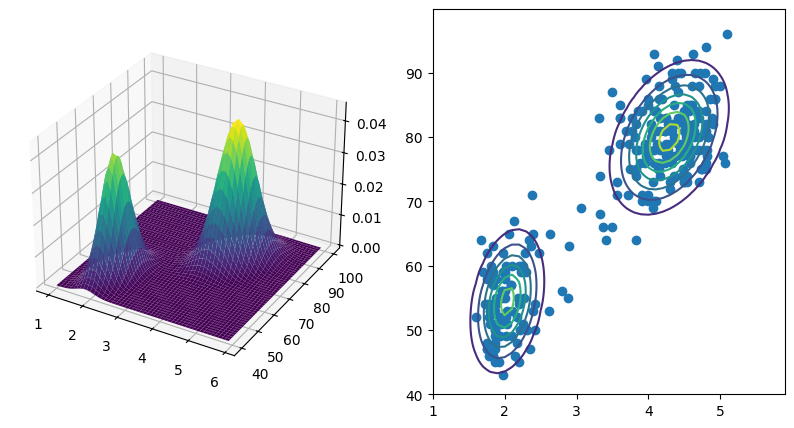

In [71]:
# visualize
X, Y = np.meshgrid(np.arange(1, 6, 0.1), np.arange(40, 100, 0.1))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1, projection = "3d")
ax1.plot_surface(X, Y, Z, cmap = 'viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(X, Y, Z)
ax2.scatter(xs[:, 0], xs[:, 1])

fig.show()

### 5.5.3 データ生成

In [73]:
N = 500
new_xs = np.zeros((N, 2))
for n in range(N):
    k = np.random.choice(2, p = phis)
    mu, cov = mus[k], covs[k]
    new_xs[n] = np.random.multivariate_normal(mu, cov)

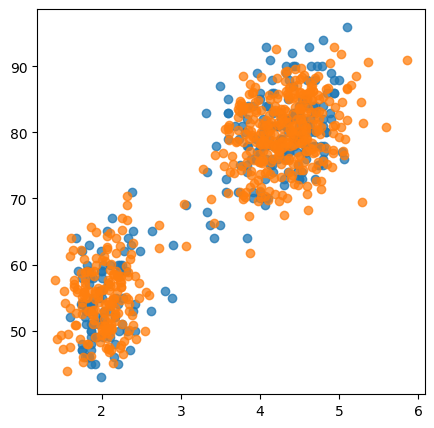

In [76]:
# visualize
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(xs[:, 0], xs[:, 1], alpha = 0.75)
ax.scatter(new_xs[:, 0], new_xs[:, 1], alpha = 0.75)
fig.show()

実データの特性を反映したデータ生成に成功した。